In [95]:
import pandas as pd

In [96]:
df = pd.read_csv('Outputs/packets-2017.05.17-processed')
type(df)


pandas.core.frame.DataFrame

In [97]:
# df = df.sort_values('payload_size')
# is_port_8088 = df['dstport']==8088
# print(is_port_8088.head())
# df = df[is_port_8088]

In [98]:
# is_32_bytes = df['payload_size']==32
# print(is_32_bytes.head())
# df = df[is_32_bytes]

In [99]:
pd.set_option("display.max.columns", None)
df.head()

,id,proto,srcip,dstip,srcport,dstport,payload_size,shannon,bien,tbien
0,Juf5u3sBoMUFiBGPvE3G,tcp,10.160.64.139,10.160.65.202,38166,445,106,0.228953,0.643489,0.795025
1,J-f5u3sBoMUFiBGPvE3G,tcp,10.160.65.202,10.160.64.139,445,38166,252,0.312818,0.608111,0.895695
2,KOf5u3sBoMUFiBGPvE3G,tcp,10.160.64.139,10.160.65.202,38166,445,124,0.160186,0.356616,0.777564
3,Kef5u3sBoMUFiBGPvE3G,tcp,10.160.65.202,10.160.64.139,445,38166,252,0.242888,0.482881,0.920906
4,Kuf5u3sBoMUFiBGPvE3G,tcp,10.160.64.139,10.160.65.202,38166,445,364,0.245487,0.696892,0.927076


In [100]:
%matplotlib inline

In [101]:
# df.plot(x='payload_size', y=['shannon','bien','tbien'],kind='box',title='32 bytes chunks in TCP of NeilDeGrasse.txt')


<AxesSubplot:xlabel='payload_size'>

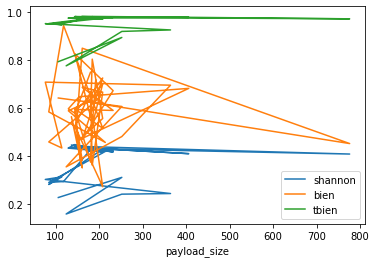

In [102]:
df.plot(x='payload_size', y=['shannon','bien','tbien'],kind='line',title='')

In [103]:
# df.to_csv('Outputs/FixedSizeCSVs/32bytesNeilDeGrasse.csv',',')